In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
sys.path.append('/mnt/c/Users/cleon/Documents/CAL_CAL/ironhack/Proyectos/W7-Kaggle_competition/src')
import cleaning as c

In [2]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,10.)})
sns.set_style("whitegrid")

## Preliminary data exploration

In [3]:
train= pd.read_csv('../data/train.csv')

In [4]:
test = pd.read_csv('../data/test.csv')

In [5]:
train.drop(columns=['id'],inplace=True)

In [6]:
train

carat        cut color clarity  depth  table     x     y     z  price
0       1.14      Ideal     G    VVS2   61.0   56.0  6.74  6.76  4.12   9013
1       0.76      Ideal     H     VS2   62.7   57.0  5.86  5.82  3.66   2692
2       0.84      Ideal     G     VS1   61.4   56.0  6.04  6.15  3.74   4372
3       1.55      Ideal     H     VS1   62.0   57.0  7.37  7.43  4.59  13665
4       0.30      Ideal     G     SI2   61.9   57.0  4.28  4.31  2.66    422
...      ...        ...   ...     ...    ...    ...   ...   ...   ...    ...
40450   0.40      Ideal     E    VVS1   60.8   57.0  4.79  4.82  2.92   1278
40451   0.52      Ideal     J     SI2   61.6   55.0  5.16  5.19  3.19    924
40452   1.00  Very Good     E     SI1   59.4   63.0  6.47  6.42  3.83   5322
40453   0.57  Very Good     E     VS1   62.9   56.0  5.31  5.35  3.35   1942
40454   2.09       Good     J     VS2   57.2   64.0  8.51  8.46  4.85  11576

[40455 rows x 10 columns]

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   x        40455 non-null  float64
 7   y        40455 non-null  float64
 8   z        40455 non-null  float64
 9   price    40455 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


## Numerical variables

<AxesSubplot:>

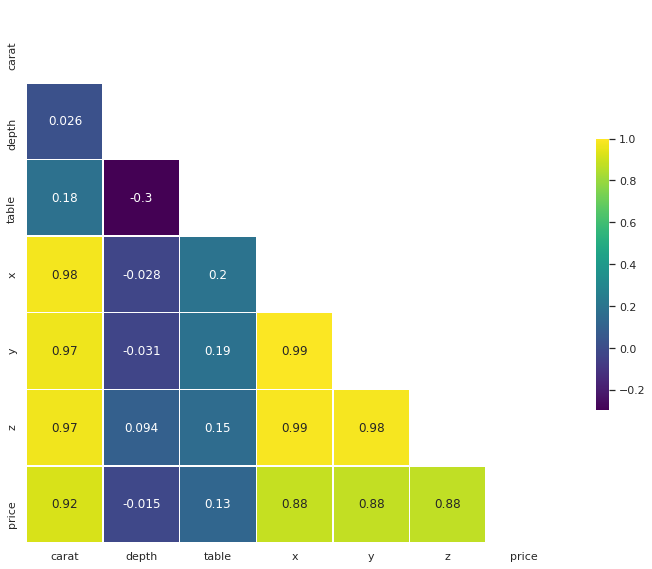

In [8]:
c.heatmap(train)

In [9]:
train.drop(columns=['x'], inplace=True)
test.drop(columns=['x'], inplace=True)

<AxesSubplot:>

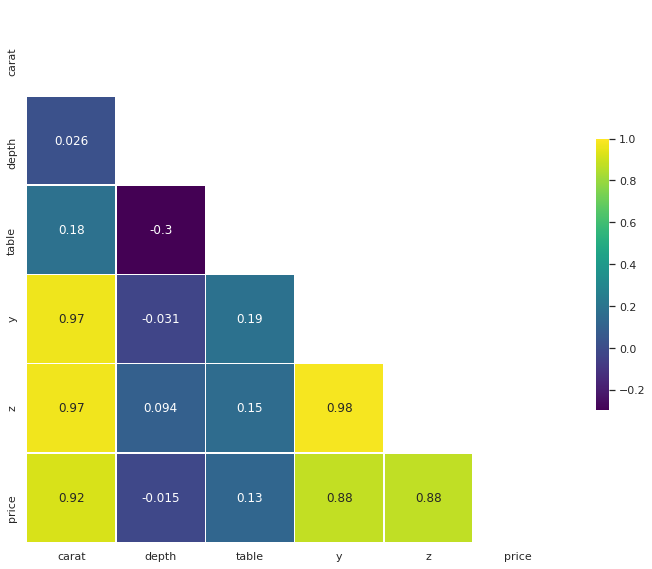

In [10]:
c.heatmap(train)

<AxesSubplot:>

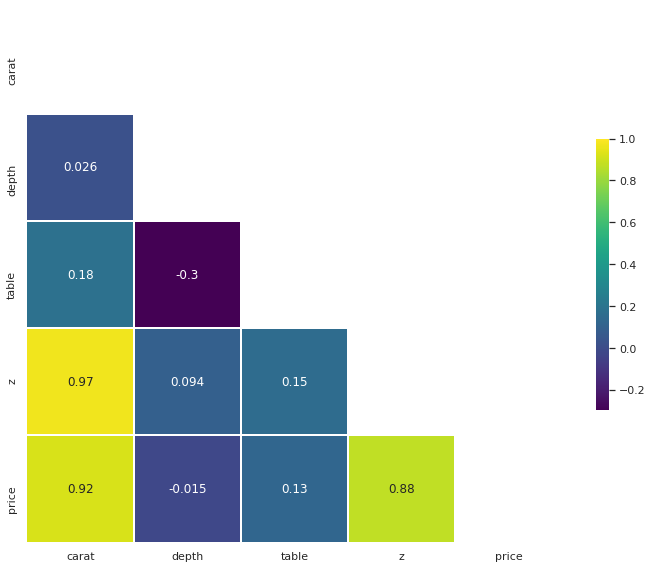

In [11]:
train.drop(columns=['y'], inplace=True)
test.drop(columns=['y'], inplace=True)
c.heatmap(train)

<AxesSubplot:>

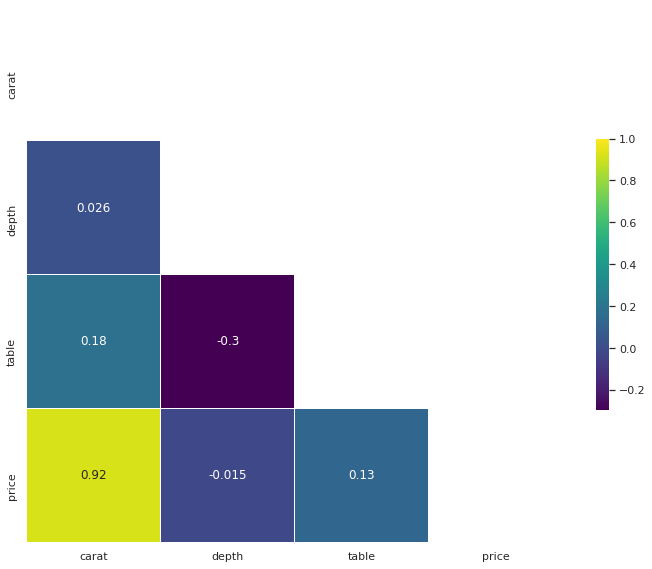

In [12]:
train.drop(columns=['z'], inplace=True)
test.drop(columns=['z'], inplace=True)
c.heatmap(train)

## Categorical Variables

In [13]:
train.cut.unique()

array(['Ideal', 'Fair', 'Very Good', 'Premium', 'Good'], dtype=object)

In [14]:
train.color.unique()

array(['G', 'H', 'F', 'J', 'E', 'I', 'D'], dtype=object)

In [15]:
train.clarity.unique()

array(['VVS2', 'VS2', 'VS1', 'SI2', 'SI1', 'VVS1', 'IF', 'I1'],
      dtype=object)

In [16]:
# train_dummies = pd.get_dummies(train, drop_first=True)

In [17]:
# train_dummies

In [18]:
clari = {'VVS2':5, 'VS2':3, 'VS1':4, 'SI2':1, 'SI1':2, 'VVS1':6, 'IF':7, 'I1':0}

In [19]:
colo = {'G':3, 'H':2, 'F':4, 'J':0, 'E':5, 'I':1, 'D':6}

In [20]:
cut= {'Ideal':4, 'Fair':0, 'Very Good':2, 'Premium':3, 'Good':1}

In [21]:
sns.scatterplot(data=train, x=train.cut, y=train.price)

<AxesSubplot:xlabel='cut', ylabel='price'>

In [22]:
sns.scatterplot(data=train, x=train.color, y=train.price)

<AxesSubplot:xlabel='color', ylabel='price'>

In [23]:
sns.scatterplot(data=train, x=train.clarity, y=train.price)

<AxesSubplot:xlabel='clarity', ylabel='price'>

It seems that these variables don't have a strong relationship with diamonds price. Let's see the correlation:

In [24]:
train.clarity = train.clarity.map(clari)
test.clarity = test.clarity.map(clari)

In [25]:
train.color = train.color.map(colo)
train.cut = train.cut.map(cut)

test.color = test.color.map(colo)
test.cut = test.cut.map(cut)

In [26]:
train.corr()

carat       cut     color   clarity     depth     table     price
carat    1.000000 -0.134463 -0.292673 -0.352151  0.025563  0.181437  0.921128
cut     -0.134463  1.000000  0.020104  0.190710 -0.219509 -0.433241 -0.052115
color   -0.292673  0.020104  1.000000 -0.026766 -0.049141 -0.023844 -0.172244
clarity -0.352151  0.190710 -0.026766  1.000000 -0.070941 -0.156182 -0.145062
depth    0.025563 -0.219509 -0.049141 -0.070941  1.000000 -0.297741 -0.015052
table    0.181437 -0.433241 -0.023844 -0.156182 -0.297741  1.000000  0.127691
price    0.921128 -0.052115 -0.172244 -0.145062 -0.015052  0.127691  1.000000

<AxesSubplot:>

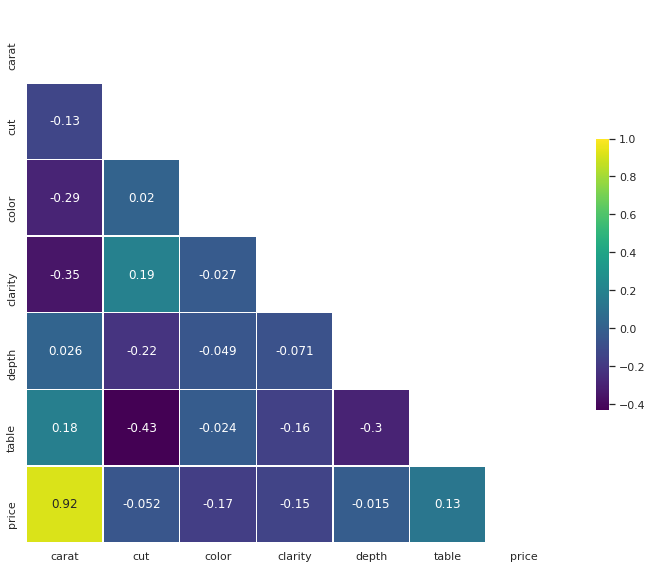

In [27]:
c.heatmap(train)

In [28]:
train.to_csv('../data/train_clean.csv')

In [29]:
test.to_csv('../data/test_clean.csv')